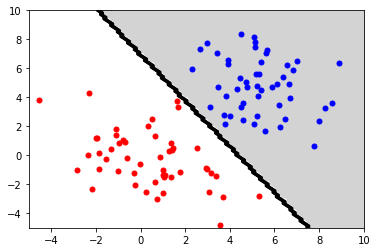

[[  2.37857446]
 [  1.49754408]
 [-10.43645355]]


In [ ]:
# 2-c
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
import scipy.stats as stats

N=100

class_0=np.loadtxt("data/homework4_class0.txt")
class_1=np.loadtxt("data/homework4_class1.txt")
bias = np.matrix(np.ones(100)).T
X = np.vstack((class_0,class_1))
X = np.hstack((X,bias))
y = np.vstack((np.matrix(np.zeros(50)).T,np.matrix(np.ones(50)).T))

#==== CVX =====#
lam = 0.0001
theta       = cvx.Variable((3,1))
loss        = - cvx.sum(cvx.multiply(y, X @ theta)) \
              + cvx.sum(cvx.log_sum_exp( cvx.hstack([np.zeros((N,1)), X @ theta]), axis=1 ) )
reg         = cvx.sum_squares(theta)
prob        = cvx.Problem(cvx.Minimize(loss/N + lam*reg))
prob.solve()
w = theta.value
#==============#

plt.plot(X[0:50,0],X[0:50,1],'ro',markersize=5)
plt.plot(X[50:100, 0],X[50:100,1],'bo',markersize=5)

pos_i, pos_j = [] , []
neg_i, neg_j = [] , []
test_p = np.linspace(-5,10, 100)
test_plot = np.zeros((100,100))
boundary = np.zeros((100,100))
for iter_i,i in enumerate(test_p):
  for iter_j, j in enumerate(test_p):
    out = 1/(1+np.exp(-(w[0]*i+w[1]*j + w[2])))
    if out > 0.5: 
      dec = 1
      pos_i.append(i)
      pos_j.append(j)
    else: 
      dec = 0
      neg_i.append(i)
      neg_j.append(j)      
    test_plot[iter_i,iter_j] = dec
    boundary[iter_i,iter_j] = out

plt.scatter(pos_i,pos_j,color = '#D3D3D3')
plt.scatter(neg_i,neg_j,color = '#ffffff')
plt.contour(test_p, test_p, boundary.T>=0.5, linewidths=2, colors='k')
plt.show()

print(w)

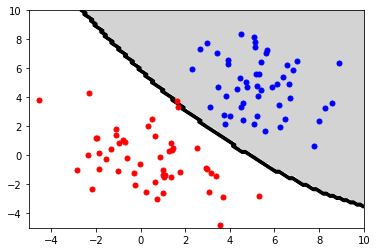

In [ ]:
# 2-d 
mu0 = [np.mean(class_0[0:50,0]),np.mean(class_0[0:50,1])]
mu1 = [np.mean(class_1[0:50,0]),np.mean(class_1[0:50,1])]
cov0 = np.cov(class_0.T)
cov1 = np.cov(class_1.T)
inv_cov0 = np.linalg.inv(cov0)
inv_cov1 = np.linalg.inv(cov1)
det_cov0 = np.linalg.det(cov0)
det_cov1 = np.linalg.det(cov1)

p0=0.5
p1=0.5

pos_i, pos_j = [] , []
neg_i, neg_j = [] , []
test_p = np.linspace(-5,10, 100)
test_plot = np.zeros((100,100))
boundary = np.zeros((100,100))
for iter_i,i in enumerate(test_p):
  for iter_j, j in enumerate(test_p):
    test_point=np.array([i,j])
    c1 = (-1/2)*(test_point-mu1).T@inv_cov1@(test_point-mu1)+np.log(p1)-(1/2)*np.log(det_cov1)
    c0 = (-1/2)*(test_point-mu0).T@inv_cov0@(test_point-mu0)+np.log(p0)-(1/2)*np.log(det_cov0)  
    if c1>c0: 
      dec = 1
      pos_i.append(i)
      pos_j.append(j)
    else: 
      dec = 0
      neg_i.append(i)
      neg_j.append(j)      
    test_plot[iter_i,iter_j] = dec
    boundary[iter_i,iter_j] = c1/c0

plt.scatter(pos_i,pos_j,color = '#D3D3D3')
plt.scatter(neg_i,neg_j,color = '#ffffff')

plt.plot(X[0:50,0],X[0:50,1],'ro',markersize=5)
plt.plot(X[50:100, 0],X[50:100,1],'bo',markersize=5)
plt.contour(test_p, test_p, boundary.T>=1, linewidths=2, colors='k')

plt.show()


In [ ]:
# 3-a
#kernel function
def kernel(x1,x2,h):
   #return np.exp(-((np.linalg.norm(x1-x2))**2)/h)
   return np.exp(-np.sum((x1-x2)**2,axis=-1)/h)

N=100

class_0=np.loadtxt("data/homework4_class0.txt")
class_1=np.loadtxt("data/homework4_class1.txt")
X = np.hstack((np.hstack((class_0.T,class_1.T)).T, np.ones((N,1))))
y = np.vstack((np.matrix(np.zeros(50)).T,np.matrix(np.ones(50)).T))
K = np.zeros((100,100))

h=1
for i in range(100):
  for j in range(100):
    K[i,j] = kernel(X[i],X[j],h)

print(K[47:52,47:52])
a = np.linalg.lstsq(K + 0.0001*np.eye(N),y)[0]

[[1.00000000e+00 5.05310080e-25 6.06536602e-20 4.65474122e-29
  4.06890793e-17]
 [5.05310080e-25 1.00000000e+00 3.95931666e-13 2.69357110e-33
  5.38775392e-12]
 [6.06536602e-20 3.95931666e-13 1.00000000e+00 2.30352619e-65
  3.78419625e-34]
 [4.65474122e-29 2.69357110e-33 2.30352619e-65 1.00000000e+00
  2.16278503e-06]
 [4.06890793e-17 5.38775392e-12 3.78419625e-34 2.16278503e-06
  1.00000000e+00]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [ ]:
# 3-c
N=100

class_0=np.loadtxt("data/homework4_class0.txt")
class_1=np.loadtxt("data/homework4_class1.txt")
X = np.hstack((np.hstack((class_0.T,class_1.T)).T, np.ones((N,1))))
y = np.vstack((np.matrix(np.zeros(50)).T,np.matrix(np.ones(50)).T))

#==== CVX =====#
lam = 0.0001
alpha       = cvx.Variable((100,1))
loss        = - y.T@K@alpha \
              + cvx.sum(cvx.log_sum_exp( cvx.hstack([np.zeros((N,1)), K @ alpha]), axis=1 ) )
reg         = cvx.quad_form(alpha,K)
prob        = cvx.Problem(cvx.Minimize(loss/N + lam*reg))
prob.solve()
a = alpha.value
print(a[0:2])

[[-0.95245074]
 [-1.21046707]]


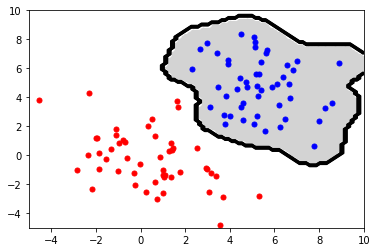

In [ ]:
# 3-d
import sys
N=100
pos_i, pos_j = [] , []
neg_i, neg_j = [] , []

test_x = np.linspace(-5,10, 100)
test_y = np.linspace(-5,10, 100) 
test_plot = np.zeros((100,100))
boundary = np.zeros((100,100))
for iter_i,i in enumerate(test_x):
  for iter_j, j in enumerate(test_y):
    test_point=np.array([j,i,1])
    y=0
    for k in range(N):
      y+=a[k]*kernel(X[k],test_point,h)
    boundary[iter_i,iter_j]= y
    if y >0.5: 
      dec = 1
      pos_i.append(i)
      pos_j.append(j)
    else: 
      dec = 0
      neg_i.append(i)
      neg_j.append(j)      
    test_plot[iter_i,iter_j] = dec
    
plt.scatter(pos_j,pos_i,color = '#D3D3D3')
plt.scatter(neg_j,neg_i,color = '#ffffff')

plt.plot(X[0:50,0],X[0:50,1],'ro',markersize=5)
plt.plot(X[50:100, 0],X[50:100,1],'bo',markersize=5)
plt.contour(test_x, test_y, boundary>0.5, linewidths=2, colors='k')


In [ ]:
!unzip hw4_data.zip

Archive:  hw4_data.zip
   creating: data/
  inflating: data/homework4_class0.txt  
  inflating: data/homework4_class1.txt  
